<a href="https://colab.research.google.com/github/enyabuti/Ezra/blob/master/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Capstone Three**

The focus of this notebook is to analyze the data and have better insights on how sales was perfomed that year.
Description of data:


1.   **Order ID** - This represents the product identification number.
2.   **Product** - The product being sold.
3.   **Quantity Ordered** - Represnts the amount of product ordered.
4.   **Price Each** - This is the price tag for each product.
5.   **Order Date** -  This represent the day the product was bought.
6.   **Purchase Adress** - This represent the customer's address.
7.   **Month** - The month the product was born.
8.   **Sales** - Price of the amounts sold.
9.   **City** - The city where the product is shipped to.
10.  **Hour** - The time of day when the product was bought

Key Activities: 


* What was the best month for sales? How much was earned that month?
* What city sold the most product?
*	What time should we display advertisements to maximize the likelihood of customer’s buying product?
*	What products are most often sold together?
*	What product sold the most? 






In [2]:


from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


### **Importing Dataset**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

data = pd.read_csv("/content/gdrive/MyDrive/Sales Data.csv").dropna()
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


# **Part one**
Find the amount of products ordered.

In [ ]:
product_amount = data[["Product", "Quantity Ordered"]].groupby("Product").sum()
product_amount.head()


,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635


Sort from largest to smallest amount of products.

In [ ]:
product_amount = product_amount["Quantity Ordered"].sort_values(ascending=False)
product_amount.head()

Product
AAA Batteries (4-pack)      31017
AA Batteries (4-pack)       27635
USB-C Charging Cable        23975
Lightning Charging Cable    23217
Wired Headphones            20557
Name: Quantity Ordered, dtype: int64

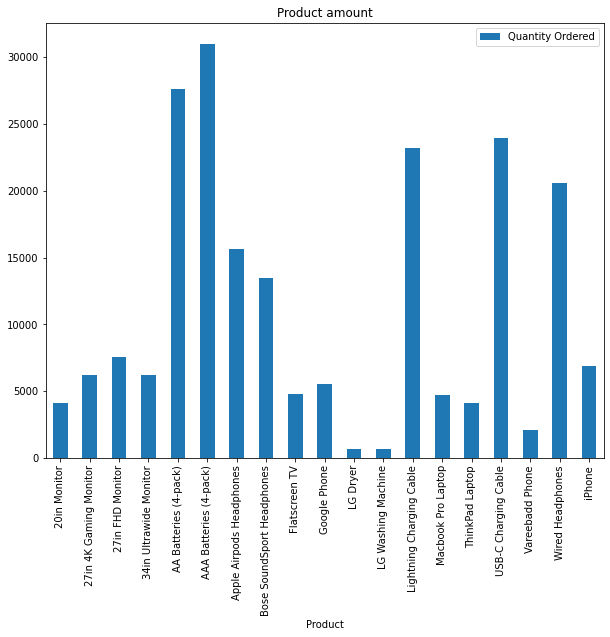

In [ ]:
product_amount = data[["Product", "Quantity Ordered"]].groupby("Product").sum().plot.bar(title = 'Product amount', figsize = (10,8))
product_amount

Each month sales


In [ ]:
month_sales = data[['Month', 'Sales']].groupby("Month").sum().
month_sales

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


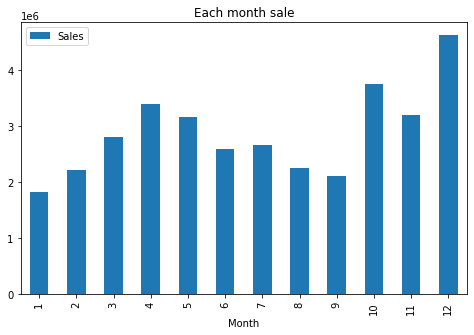

In [ ]:
month_sales = data[['Month', 'Sales']].groupby("Month").sum().plot.bar(title='Each month sale',figsize=(8,5))
month_sales

Top five months with most sales

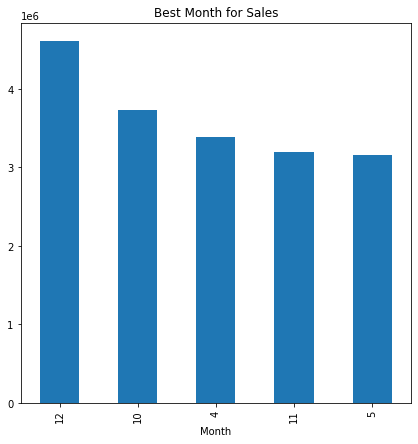

In [ ]:
month_sales = data[['Month', 'Sales']].groupby('Month')['Sales'].sum().nlargest(5).plot.bar(title='Best Month for Sales',figsize=(7,7))
month_sales

*December is the month with most sales


## **Part 2**
The city that had the most sales


In [ ]:
city_sales = data[['City', 'Sales']].groupby('City')['Sales'].sum().nlargest(5)
city_sales

City
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
Name: Sales, dtype: float64

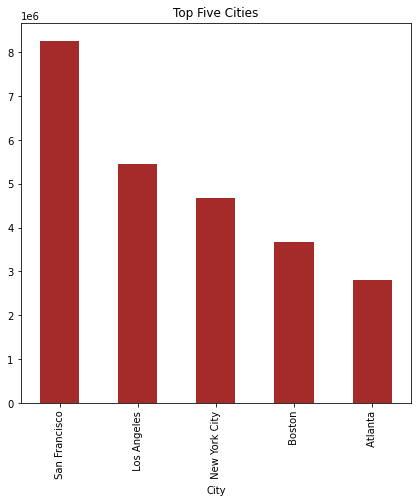

In [ ]:
city_sales = data[['City', 'Sales']].groupby('City')['Sales'].sum().nlargest(5).plot.bar(title='Top Five Cities',figsize=(7,7), color='brown')
city_sales

Sales by hour

In [ ]:
hour_sale = data[['Hour', 'Sales']].groupby('Hour')['Sales'].sum()
hour_sale

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

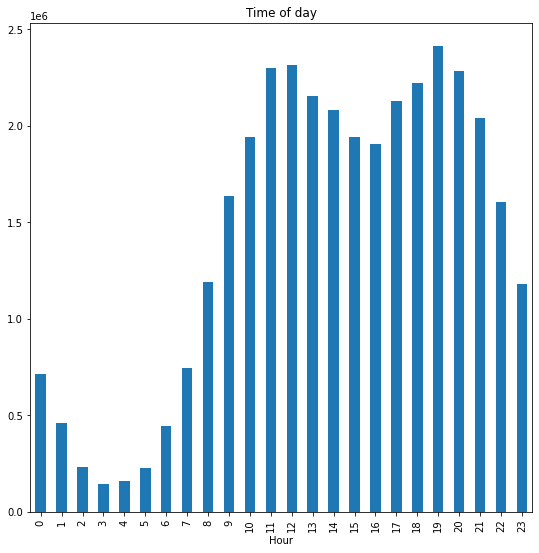

In [ ]:
hour_sale = data[['Hour', 'Sales']].groupby('Hour')['Sales'].sum().plot.bar(title='Time of day',figsize=(9,9))
hour_sale

Around 11am to 3pm and 5pm to 10pm has the most sales.